# Analyzing Account Types

In [12]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Data
df = pd.read_excel('DonationsC5LA.xlsx')
df.head()

,Masked Account ID,Maked Primary Campaign,Stage,Account Type,Billing Zip/Postal Code,Fiscal Period,Close Date,Amount
0,1,NaN,Closed Won,Household,90069,Q3-2022,7/5/2022,200000.00
1,1,NaN,Closed Won,Household,90069,Q3-2023,7/14/2023,200000.00
2,1,NaN,Closed Won,Household,90069,Q3-2019,7/17/2019,5000028.69
3,1,NaN,Closed Won,Household,90069,Q1-2019,3/12/2019,320000.00
4,1,NaN,Closed Won,Household,90069,Q2-2020,4/27/2020,220000.00


## Understanding Each Account Type

### Getting the Count of Each Account Type

In [4]:
# Get the Count of Each Account Type
account_type_counts = df['Account Type'].value_counts()
print("Count of Each Account Type:")
print(account_type_counts)

Count of Each Account Type:
Account Type
Household    2659
Corporate     463
Name: count, dtype: int64


### Get the Average Donations for Each Account Type

In [6]:
average_donations_by_type = df.groupby('Account Type')['Amount'].mean()
print("Average Donations by Account Type:")
print(average_donations_by_type)

Average Donations by Account Type:
Account Type
Corporate    3781.166436
Household    3555.823264
Name: Amount, dtype: float64


### Create a Bar Plot for Average Donations by Account Type

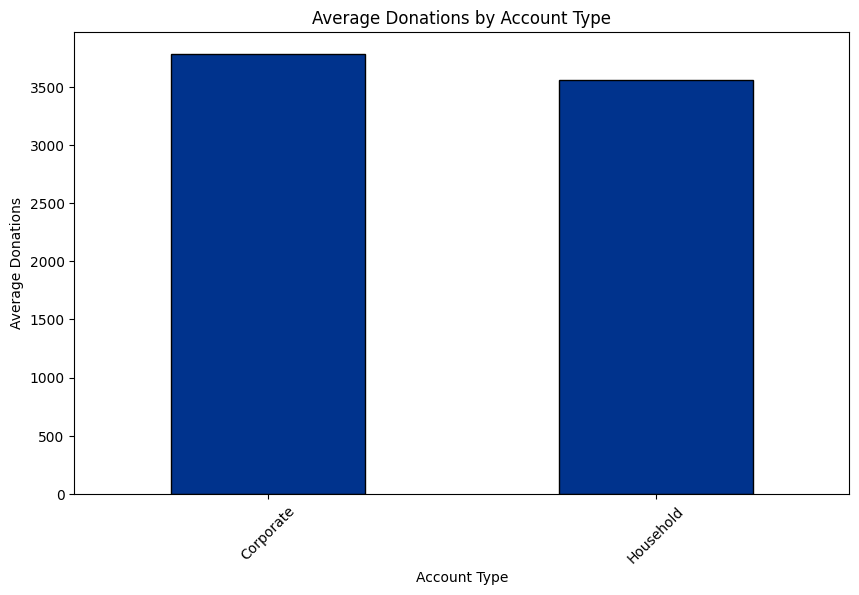

In [7]:
plt.figure(figsize=(10, 6))
average_donations_by_type.plot(kind='bar', color='#00338D', edgecolor='black')
plt.xlabel('Account Type')
plt.ylabel('Average Donations')
plt.title('Average Donations by Account Type')
plt.xticks(rotation=45)
plt.show()

## Comparing Account Types

In [10]:
# Create DataFrames for each account type
corporate_df = df[df['Account Type'] == 'Corporate']
household_df = df[df['Account Type'] == 'Household']

/var/folders/cm/ndw7gpxs6qv3lsg9ygv10sqw0000gn/T/ipykernel_7628/3757708787.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Account_Type', y='Amount', palette='Set2')


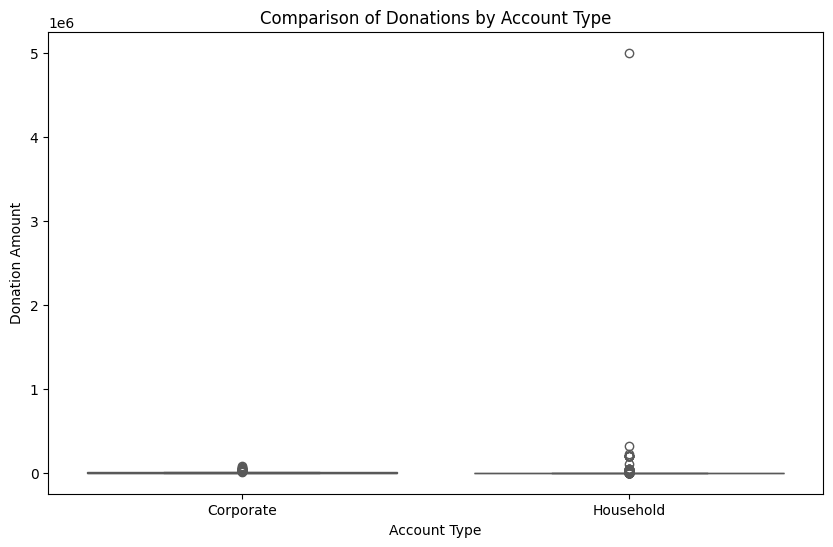

In [13]:
combined_df = pd.concat([corporate_df.assign(Account_Type='Corporate'),
                          household_df.assign(Account_Type='Household')])

# Create a boxplot to compare donations
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Account_Type', y='Amount', palette='Set2')
plt.title('Comparison of Donations by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Donation Amount')
plt.show()


In [18]:
# Removing the maximum value - woah!

max_household_value = household_df['Amount'].max()
household_df_filtered = household_df[household_df['Amount'] != max_household_value]

In [19]:
# Calculate average donations for each account type
average_corporate = corporate_df['Amount'].mean()
average_household = household_df_filtered['Amount'].mean()

# Statistics for Corporate Accounts
corporate_stats = corporate_df['Amount'].describe()
print("\nStatistics for Corporate Account Donations:")
print(corporate_stats)

# Statistics for Household Accounts (after removing max)
household_stats = household_df_filtered['Amount'].describe()
print("\nStatistics for Household Account Donations (Excluding Max):")
print(household_stats)


Statistics for Corporate Account Donations:
count      463.000000
mean      3781.166436
std       8303.416692
min          0.000000
25%        250.000000
50%       1000.000000
75%       5000.000000
max      75000.000000
Name: Amount, dtype: float64

Statistics for Household Account Donations (Excluding Max):
count      2658.000000
mean       1676.036633
std       13703.505107
min        -200.000000
25%         100.000000
50%         250.000000
75%         500.000000
max      320000.000000
Name: Amount, dtype: float64


/var/folders/cm/ndw7gpxs6qv3lsg9ygv10sqw0000gn/T/ipykernel_7628/3127989949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Account_Type', y='Amount', palette='Set2')


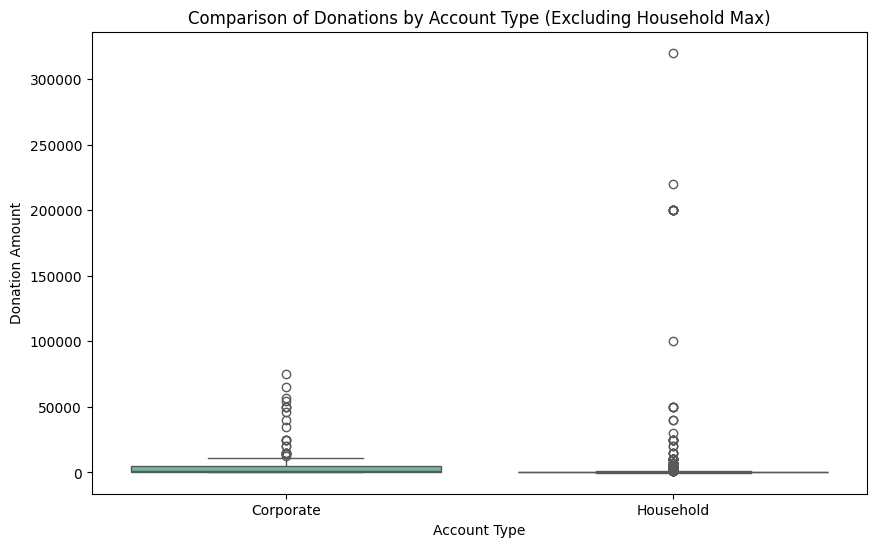

In [21]:
# Create a boxplot to compare donations
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Account_Type', y='Amount', palette='Set2')

plt.title('Comparison of Donations by Account Type (Excluding Household Max)')
plt.xlabel('Account Type')
plt.ylabel('Donation Amount')
plt.show()

/var/folders/cm/ndw7gpxs6qv3lsg9ygv10sqw0000gn/T/ipykernel_7628/2188736451.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_filtered_df, x='Account Type', y='Amount', palette='Set2')


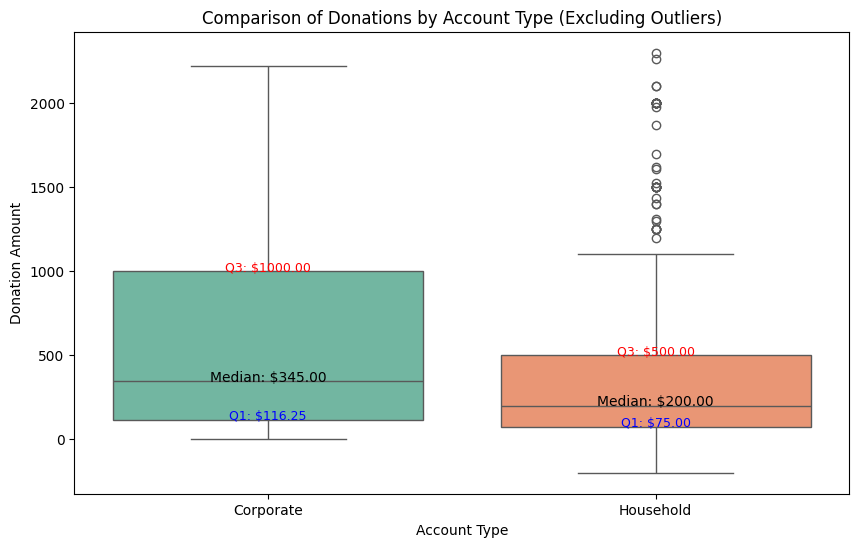

In [22]:
# Let's avoid outliers...

# Calculate the IQR for Amount
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
filtered_df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

# Create a new DataFrame for each Account Type
corporate_df = filtered_df[filtered_df['Account Type'] == 'Corporate']
household_df = filtered_df[filtered_df['Account Type'] == 'Household']

# Combine the filtered data for plotting
combined_filtered_df = pd.concat([corporate_df, household_df])

# Create a boxplot to compare donations excluding outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_filtered_df, x='Account Type', y='Amount', palette='Set2')

# Adding statistics on the plot (excluding outliers)
for account_type in ['Corporate', 'Household']:
    # Get the statistics
    stats = combined_filtered_df[combined_filtered_df['Account Type'] == account_type]['Amount'].describe()
    
    # Annotate the plot
    plt.text(x=account_type, y=stats['50%'], s=f'Median: ${stats["50%"]:.2f}', 
             horizontalalignment='center', color='black')
    plt.text(x=account_type, y=stats['25%'], s=f'Q1: ${stats["25%"]:.2f}', 
             horizontalalignment='center', color='blue', fontsize=9)
    plt.text(x=account_type, y=stats['75%'], s=f'Q3: ${stats["75%"]:.2f}', 
             horizontalalignment='center', color='red', fontsize=9)

plt.title('Comparison of Donations by Account Type (Excluding Outliers)')
plt.xlabel('Account Type')
plt.ylabel('Donation Amount')
plt.show()